In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

# Data Cleaning

In [2]:
df1 = pd.read_csv("bengaluru_house_data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df4 = df3.copy()
def get_bhk(x):
    return int(x[0])
df4['bhk'] = df3['size'].apply(get_bhk)

In [10]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [11]:
df4.groupby('bhk')['bhk'].agg('count')

bhk
1     673
2    5528
3    4832
4    1396
5     353
6     221
7     100
8      89
9      54
Name: bhk, dtype: int64

In [12]:
df3 = df4.drop('size', axis=1)

In [13]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [14]:
df3[df3['bhk'] > 20]

,location,total_sqft,bath,price,bhk


In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def not_float(x):
    try:
        float(x)
    except:
        return True
    return False

In [17]:
df3[df3['total_sqft'].apply(not_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [18]:
def convert_rangeSQFT_to_floatSQFT(x):
    tokens = x.split('-')
    if(len(tokens) == 2):
      return ((float(tokens[0]) + float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [19]:
df5 = df3.copy()
df5['total_sqft'] = df5['total_sqft'].apply(convert_rangeSQFT_to_floatSQFT)
df5.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

## Feature Engineering(Dimensity Reduction Technique)

In [20]:
df6 = df5.copy()
df6['price_per_sqft'] = (df5['price']*1000000)/df6['total_sqft']
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,1200.0,2.0,51.00,2,42500.000000


In [21]:
len(df6['location'].unique())

1304

In [22]:
df6['location'] = df6['location'].apply(lambda x: x.strip())
location_stats = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [23]:
len(location_stats[location_stats <= 10])

1052

In [24]:
df6['location'] = df6['location'].apply(lambda x: 'other' if x in location_stats[location_stats <= 10] else x)

In [25]:
len(df6['location'].unique())

242

## Outlier Removal(Standard Deviation Method)

In [26]:
df6[(df6['total_sqft']/df6['bhk'])<250]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,1350.0,7.0,85.0,8,62962.962963
70,other,500.0,3.0,100.0,3,200000.000000
...,...,...,...,...,...,...
13221,other,1178.0,9.0,75.0,9,63667.232598
13277,other,1400.0,7.0,218.0,7,155714.285714
13279,other,1200.0,5.0,130.0,6,108333.333333
13303,Vidyaranyapura,774.0,5.0,70.0,5,90439.276486


In [27]:
df7 = df6[~((df6['total_sqft']/df6['bhk'])<250)]

In [28]:
df7.shape

(12649, 6)

In [29]:
df7['price_per_sqft'].describe()

count    1.260300e+04
mean     6.365653e+04
std      4.229675e+04
min      2.678298e+03
25%      4.217934e+04
50%      5.307692e+04
75%      6.978823e+04
max      1.764706e+06
Name: price_per_sqft, dtype: float64

In [30]:
def remove_pricePerSQFT_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(m-st)) & (subdf['price_per_sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [31]:
df8 = remove_pricePerSQFT_outliers(df7)
df8.shape

(10406, 6)

In [32]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df['location']==location) & (df['bhk']==2)]
    bhk3 = df[(df['location']==location) & (df['bhk']==3)]
    matplotlib.rcParams['figure.figsize'] = (10,10)
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK')
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color='red', label='3 BHK')
    plt.xlabel('Total Area(in square feet)')
    plt.ylabel('Price (in Lakh Rupees)')
    plt.title(location)
    plt.legend()

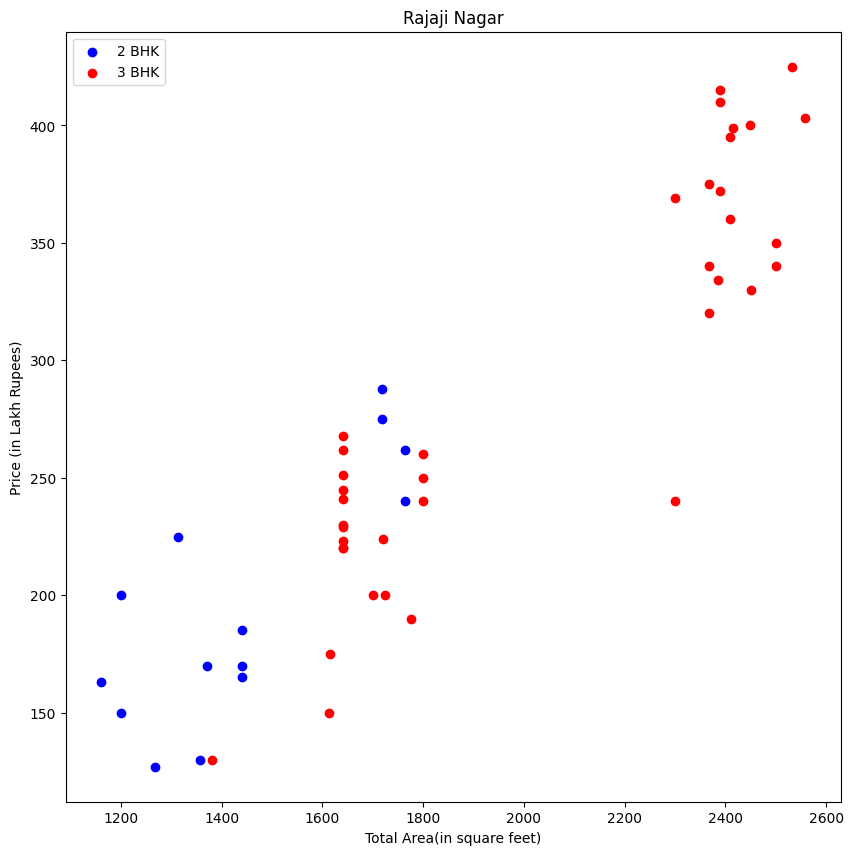

In [33]:
plot_scatter_chart(df8, 'Rajaji Nagar')

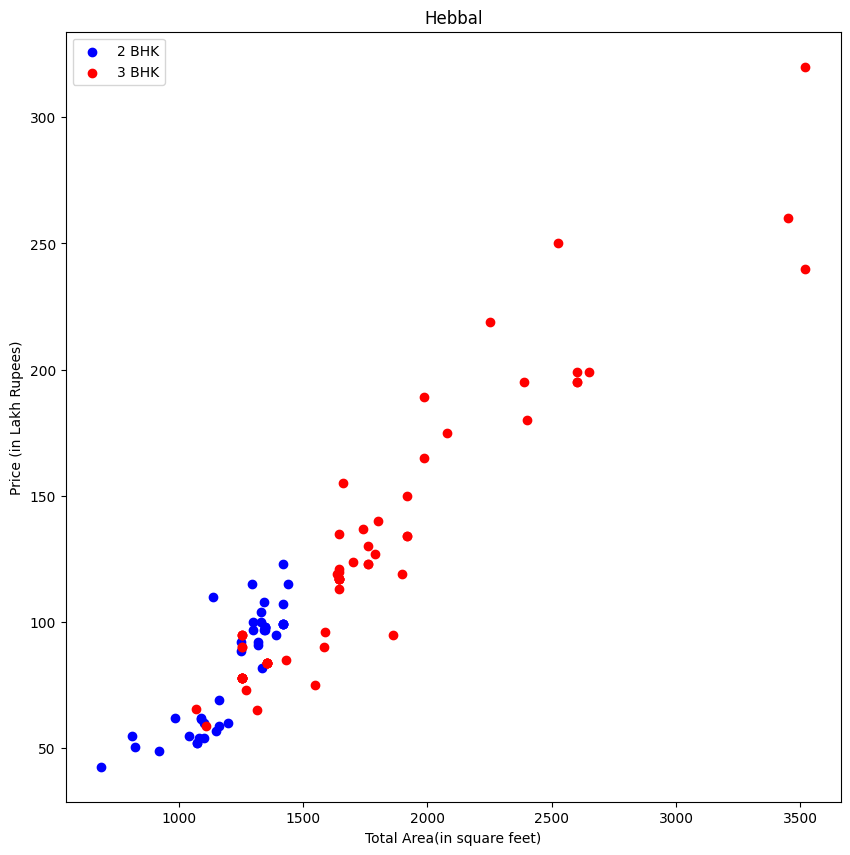

In [34]:
plot_scatter_chart(df8, 'Hebbal')

In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [36]:
df9 = remove_bhk_outliers(df8)
df9.shape

(7404, 6)

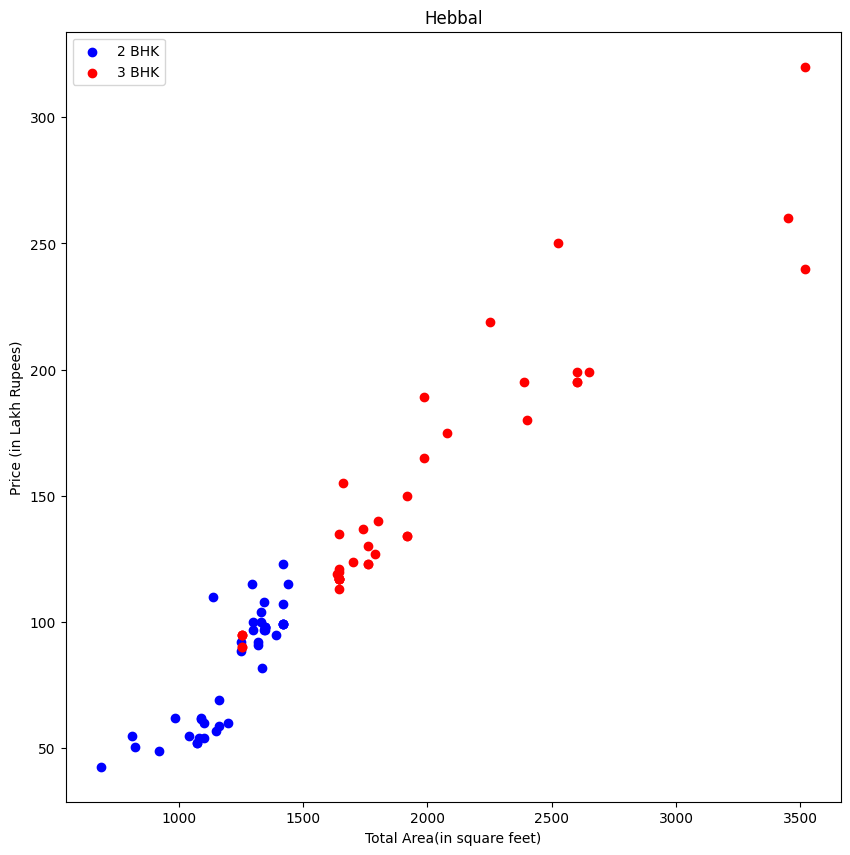

In [37]:
plot_scatter_chart(df9, 'Hebbal')

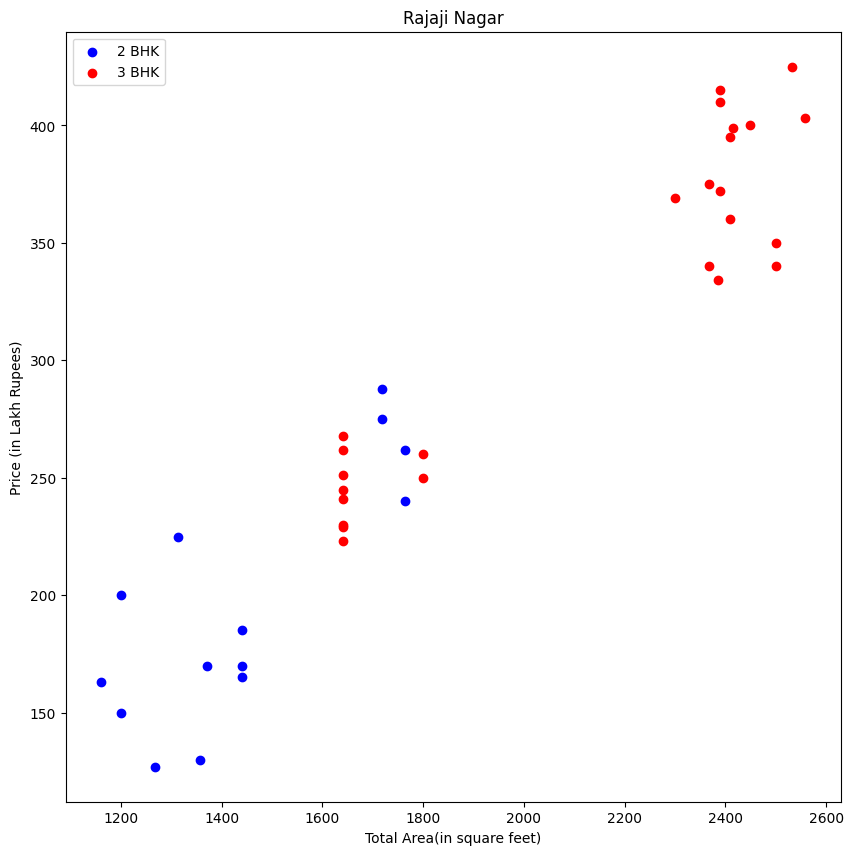

In [38]:
plot_scatter_chart(df9, 'Rajaji Nagar')

# Data Follows a Normal Distribution (Bell Curve)

Text(0, 0.5, 'Count')

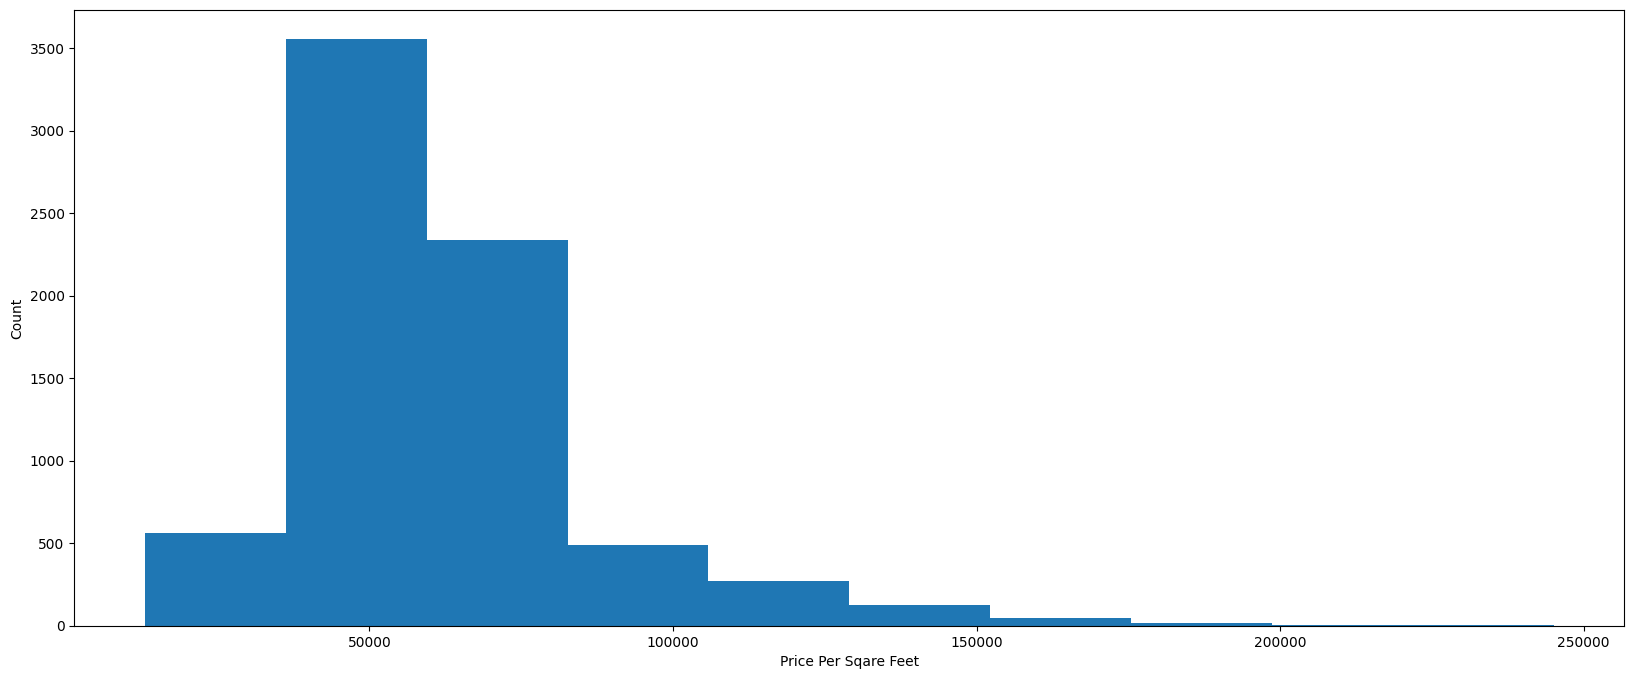

In [39]:
matplotlib.rcParams['figure.figsize'] = (20,8)
plt.hist(df9['price_per_sqft'])
plt.xlabel("Price Per Sqare Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

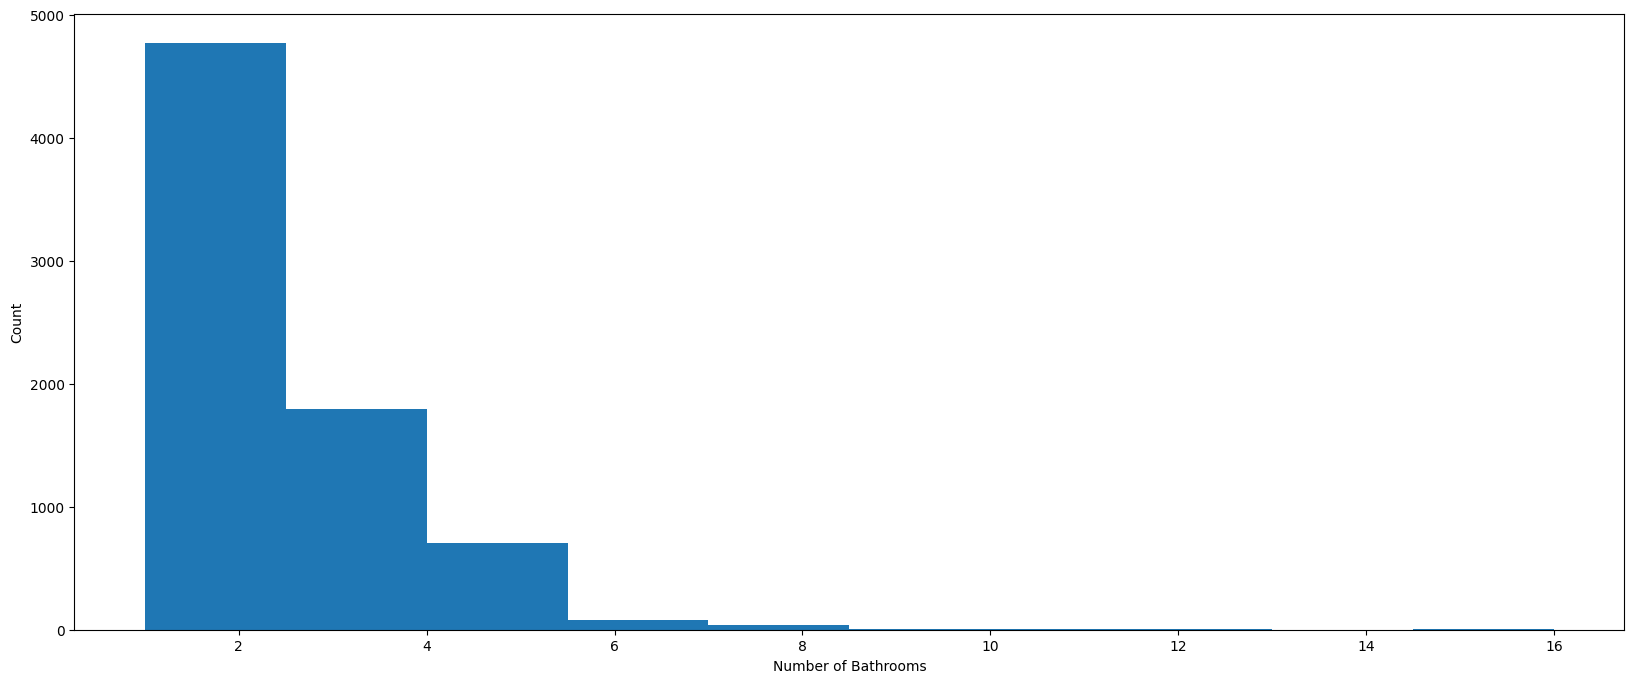

In [40]:
matplotlib.rcParams['figure.figsize'] = (20,8)
plt.hist(df9['bath'])
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [41]:
df9[df9['bath'] > df9['bhk']+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1534,Chamrajpet,1500.0,9.0,230.0,6,153333.333333
1667,Chikkabanavar,2460.0,7.0,80.0,4,32520.325203
5217,Munnekollal,7200.0,10.0,200.0,1,27777.777778
5331,Nagasandra,7000.0,8.0,450.0,4,64285.714286
5371,Neeladri Nagar,4000.0,12.0,160.0,1,40000.000000
6824,Thanisandra,1806.0,6.0,116.0,3,64230.343300
8151,other,5000.0,9.0,360.0,1,72000.000000
8382,other,750.0,10.0,90.0,1,120000.000000
8542,other,11338.0,9.0,1000.0,6,88198.976892
8617,other,12000.0,12.0,525.0,1,43750.000000


In [42]:
df10 = df9[df9['bath'] < df9['bhk']+2]
df10.shape

(7314, 6)

In [43]:
df10 = df10.drop(['price_per_sqft'],axis='columns')
df10.head(2)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3


In [44]:
dummies = pd.get_dummies(df10['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')

In [48]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Machine Learning Model(Linear Regression)

In [57]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
y = df12['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8589740578008385

In [63]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    x_df = pd.DataFrame([x], columns=X.columns)
    return lr_clf.predict(x_df)[0]

In [64]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

np.float64(83.25893293666253)

In [65]:
predict_price('Indira Nagar', 1000, 2, 2)

np.float64(185.12441109766667)

# Import Model

In [66]:
import pickle
with open('../server/artifacts/house_price_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [67]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))